## # Machine Learning - Decision Tree Classifier

### Step-01: Import all the libraries required to implement Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Step-02: Import load_iris from sklearn.datasets

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
df = sns.load_dataset("iris")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
x = df.iloc[:,:-1]
y = dataset.target

In [9]:
print(x.head())
print(x.shape)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
(150, 4)


In [10]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Step-03: Import train_test_split from sklern.model_selection

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [13]:
print(x_train.head())
print(x_train.shape)

     sepal_length  sepal_width  petal_length  petal_width
69            5.6          2.5           3.9          1.1
135           7.7          3.0           6.1          2.3
56            6.3          3.3           4.7          1.6
80            5.5          2.4           3.8          1.1
123           6.3          2.7           4.9          1.8
(100, 4)


In [14]:
print(x_test.head())
print(x_test.shape)

     sepal_length  sepal_width  petal_length  petal_width
114           5.8          2.8           5.1          2.4
62            6.0          2.2           4.0          1.0
33            5.5          4.2           1.4          0.2
107           7.3          2.9           6.3          1.8
7             5.0          3.4           1.5          0.2
(50, 4)


In [15]:
print(y_train)
print(y_train.shape)

[1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2
 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0
 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]
(100,)


In [16]:
print(y_test)
print(y_test.shape)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]
(50,)


### Step-04: Import DecisionTreeClassifier from sklearn.tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
decision_tree_classifier = DecisionTreeClassifier()

In [19]:
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = decision_tree_classifier.predict(x_test)

In [21]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2])

### Step-05: Import tree from sklearn

In [22]:
from sklearn import tree

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.75, 'x[3] <= 1.75\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(0.4, 0.5833333333333334, 'x[2] <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 5.0\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.2, 0.25, 'x[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.7, 0.4166666666666667, 'x[0] <= 5.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1,

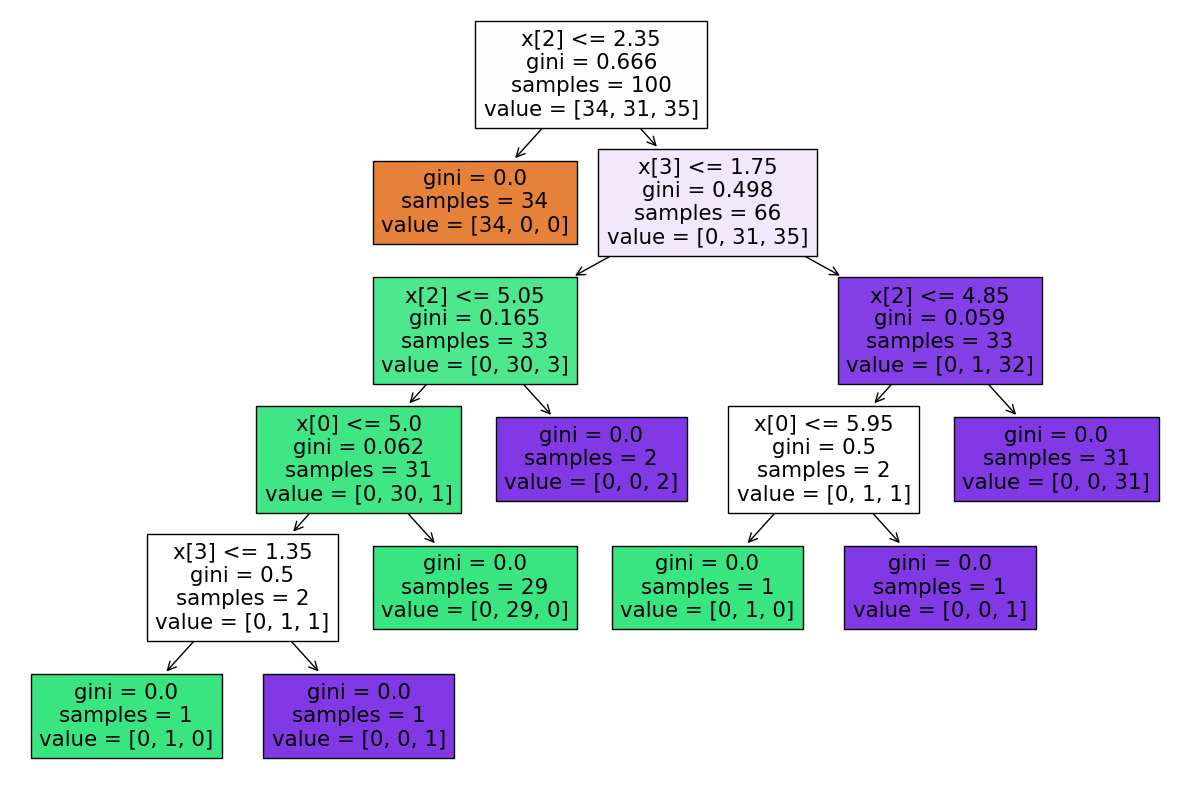

In [23]:
plt.figure(figsize = (15,10))
tree.plot_tree(decision_tree_classifier, filled = True)

### Step-06: Import confusion_matrix, accuracy_score, classification_report from sklearn.metrics

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [25]:
print("Confusion Matrix: \n {}" .format(confusion_matrix(y_test, y_pred)))
print("Accuracy: \n {}" .format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}" .format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
Accuracy: 
 0.96
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## # Decision Tree Classifier - Post Pruning

### Step-01: Import DecisionTreeClassifier from sklearn.tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
decision_tree_classifier = DecisionTreeClassifier(max_depth = 2)

In [28]:
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [29]:
y_pred = decision_tree_classifier.predict(x_test)

In [30]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2])

### Step-02: Import tree from sklearn

In [31]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

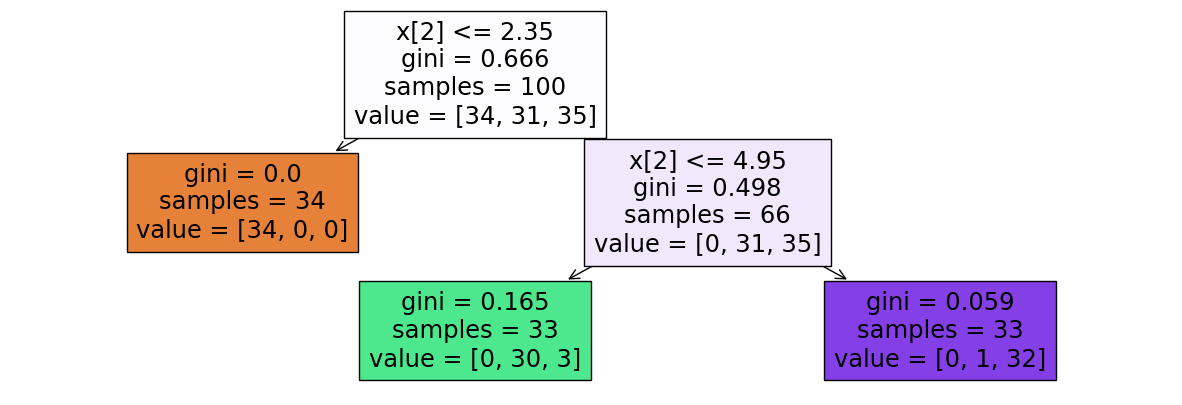

In [32]:
plt.figure(figsize = (15, 5))
tree.plot_tree(decision_tree_classifier, filled = True)

### Step-03: Import confusion_matrix, accuracy_score and classification_report from sklearn.metrics

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
print("Confusion Matrix: \n {}" .format(confusion_matrix(y_test, y_pred)))
print("Accuracy: \n {}" .format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}" .format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[16  0  0]
 [ 0 18  1]
 [ 0  3 12]]
Accuracy: 
 0.92
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.86      0.95      0.90        19
           2       0.92      0.80      0.86        15

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



## # Decision Tree Classifier - Pre Pruning

### Step-01: Import DecisionTreeClassifier from sklearn.tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
decision_tree_classifier = DecisionTreeClassifier()

### Step-02: Import GridSearchCV from sklearn.model_selection

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": [1,2,3,4,5],
    "max_features": ["auto", "sqrt", "log2"]
}

In [39]:
grid_search_cv = GridSearchCV(decision_tree_classifier, param_grid = parameters, scoring = "accuracy", cv = 5)

In [40]:
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
grid_search_cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [42]:
grid_search_cv.best_score_

0.97

In [43]:
decision_tree_classifier = DecisionTreeClassifier(criterion = "log_loss", max_depth = 4, max_features = "log2", splitter = "best")

In [44]:
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2')

In [45]:
y_pred = decision_tree_classifier.predict(x_test)

In [46]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2])

### Step-03: Import tree from sklearn

In [47]:
from sklearn import tree

[Text(0.4, 0.9, 'x[2] <= 2.35\nlog_loss = 1.583\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(0.2, 0.7, 'log_loss = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.7, 'x[2] <= 5.05\nlog_loss = 0.997\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(0.4, 0.5, 'x[3] <= 1.65\nlog_loss = 0.581\nsamples = 36\nvalue = [0, 31, 5]'),
 Text(0.2, 0.3, 'log_loss = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.6, 0.3, 'x[1] <= 2.85\nlog_loss = 0.863\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(0.4, 0.1, 'log_loss = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.8, 0.1, 'log_loss = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.8, 0.5, 'log_loss = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

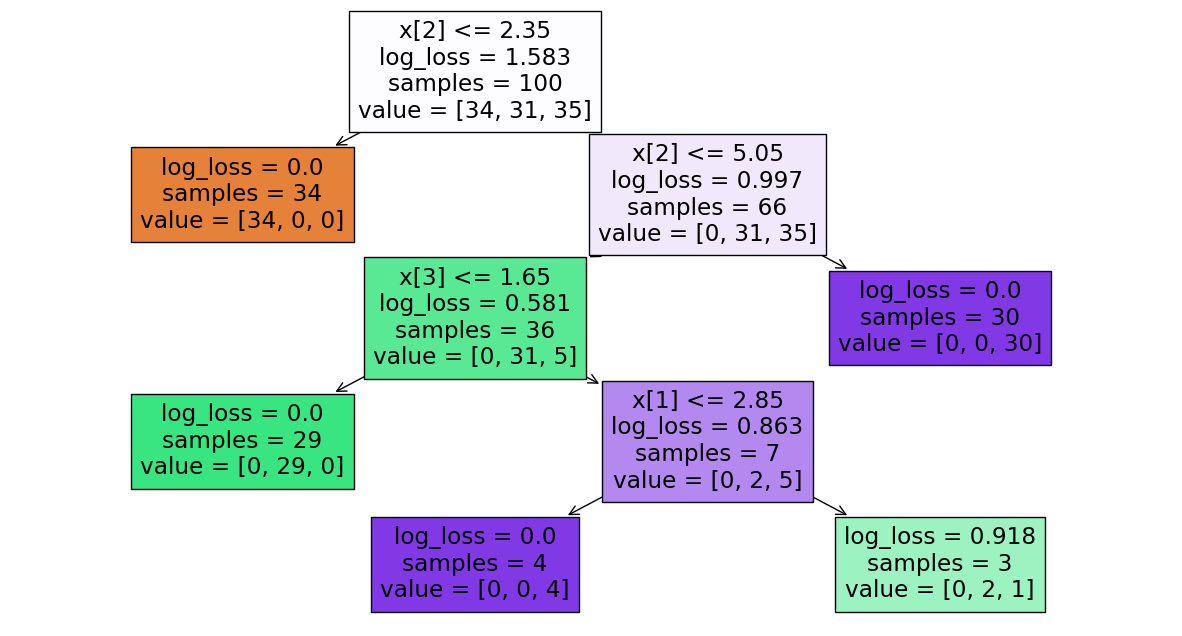

In [49]:
plt.figure(figsize = (15,8))
tree.plot_tree(decision_tree_classifier, filled = True)

### Step-04: Import confusion_matrix, accuracy_score and classification_report from sklearn.metrics

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [51]:
print("Confusion Matrix: \n {}" .format(confusion_matrix(y_test, y_pred)))
print("Accuracy: \n {}" .format(accuracy_score(y_test, y_pred)))
print("Classification Report: \n {}" .format(classification_report(y_test, y_pred)))

Confusion Matrix: 
 [[16  0  0]
 [ 0 18  1]
 [ 0  2 13]]
Accuracy: 
 0.94
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.90      0.95      0.92        19
           2       0.93      0.87      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

